# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.drop(axis='column', columns='Unnamed: 0', inplace=True)


In [4]:
df.drop_duplicates(inplace=True)
df.set_index('index').sort_index()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
0,2015-02-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,58,3.106849,2.0,False,10838.65
0,2015-05-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,58,3.106849,2.0,False,10838.65
1,2015-12-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,False,6184.10
1,2016-02-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,False,6184.10
3,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,46,2.106849,2.0,False,6450.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,2015-09-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,30,9.800000,2.0,True,5185.54
16648,2015-12-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,30,9.800000,2.0,True,5185.54
16648,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,True,5185.54


C:\Users\Bruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

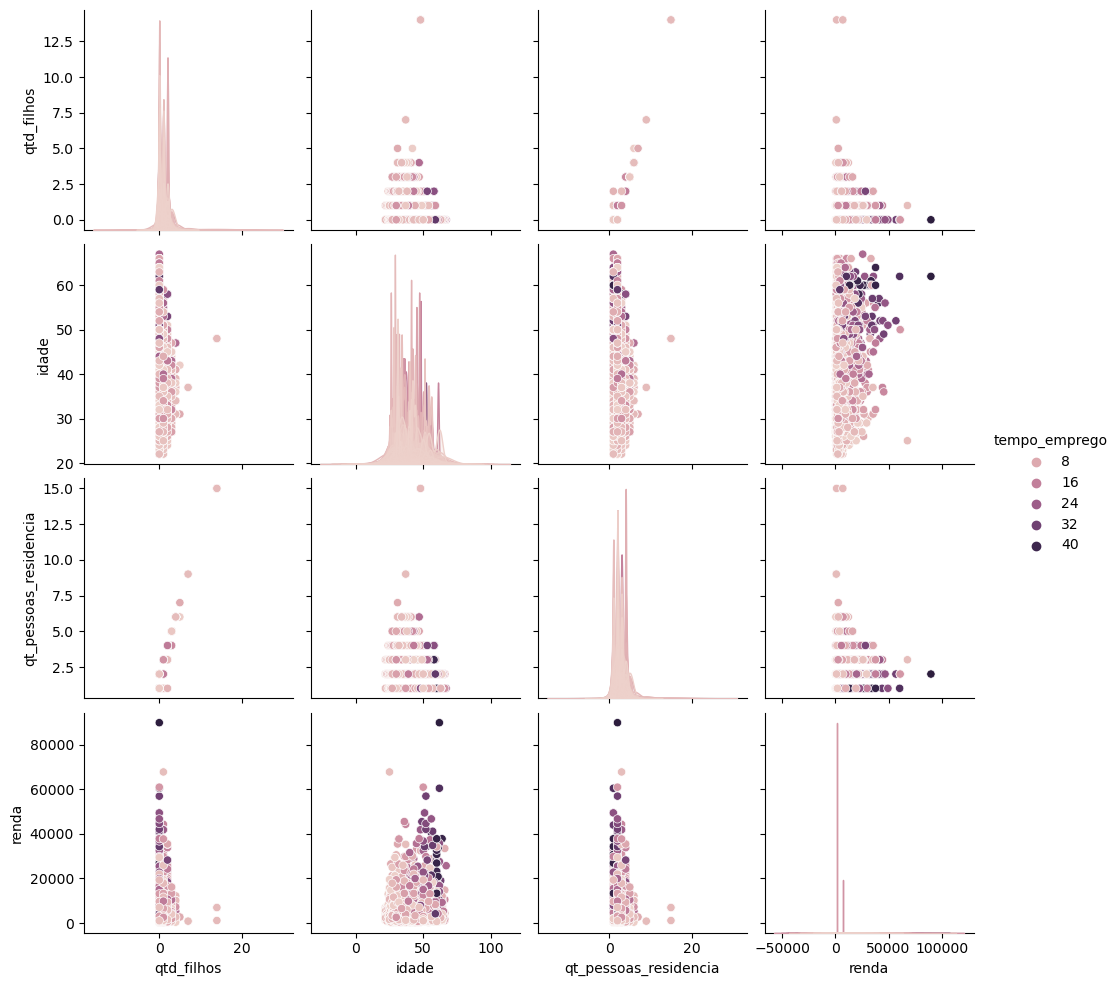

In [5]:
df2 = df[['qtd_filhos','idade','qt_pessoas_residencia','tempo_emprego','renda']]

sns.pairplot(df2, hue='tempo_emprego')

uma padrão interessante que pode ser tirado desse plot seria que quanto maior a idade maior a renda e menos pessoas morando na mesma casa.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

,renda,idade,tempo_emprego
renda,1.000000,0.042837,0.394918
idade,0.042837,1.000000,0.322335
tempo_emprego,0.394918,0.322335,1.000000


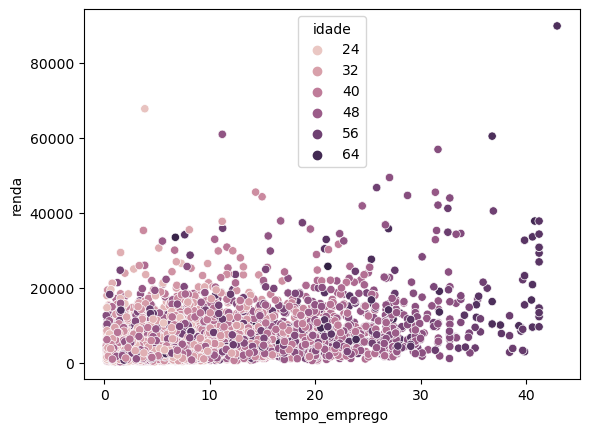

In [6]:
df3 = df[['renda','idade','tempo_emprego']]

sns.scatterplot(df3, x='tempo_emprego', y='renda', hue='idade')
df3.corr()

3) Na su aopinião, há outliers na variável renda?

Posso responder essa questão com base no grafico plotado acima. Sim, há outliers na variável renda. Eu utilizei no 'hue' a coluna "idade" e é possivel analisar que 1 dado esta acima de 80k e com mais de 40 anos.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

,renda,idade,tempo_emprego,log_y
renda,1.000000,0.042837,0.394918,0.834889
idade,0.042837,1.000000,0.322335,0.025143
tempo_emprego,0.394918,0.322335,1.000000,0.380039
log_y,0.834889,0.025143,0.380039,1.000000


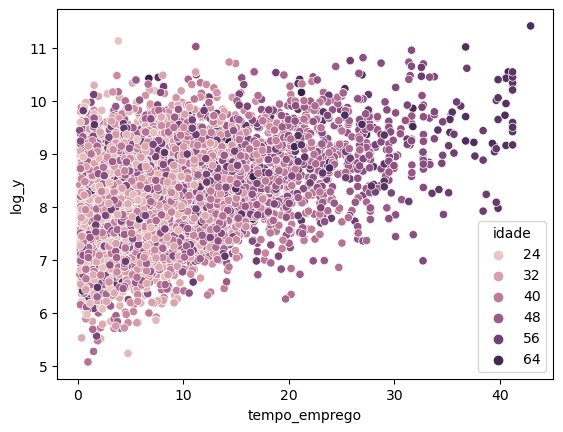

In [7]:
df4 = df[['renda','idade','tempo_emprego']]
df4_log = df4.copy()
df4_log['log_y'] = np.log(df4['renda'])
sns.scatterplot(df4_log, x='tempo_emprego', y='log_y', hue='idade')

df4_log.corr()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Com o resultado do plot acima, a aplicação do LOG piorou a análise, pois achei que ficou muito bagunçado os dados e ainda continuou com o outlier.